In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.metrics import *
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('cement_eda.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Slump,Flow,Comp_Str
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [6]:
X = df.drop(labels='Comp_Str', axis=1)
y = df['Comp_Str']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_train size: {len(X_train)}', end=', ')
print(f'X_test size: {len(X_test)}')
print(f'y_train size: {len(y_train)}', end=', ')
print(f'y_test size: {len(y_test)}')

X_train size: 72, X_test size: 31
y_train size: 72, y_test size: 31


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
estimator_grid = [
    SVR(),
    LinearSVR()  
]

svr_params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': np.logspace(-3, 2, 6),
    'degree': np.arange(1, 5),
    'gamma': ['scale', 'auto'],
    'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]
}

linear_svr_params = {
    'C': np.logspace(-3, 2, 6),
    'epsilon': [0, 0.01, 0.1, 0.5, 1, 2] 
}

param_grid = [
    svr_params,
    linear_svr_params
]


In [34]:
estimator_dict = {}
for i in range(len(estimator_grid)):
    grid_search = GridSearchCV(
        estimator=estimator_grid[i],
        param_grid=param_grid[i],
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)   
    d = {str(estimator_grid[i]).replace('()', ''): [grid_search.best_score_, grid_search.best_params_, grid_search.best_estimator_]} 
    estimator_dict.update(d)
print(estimator_dict)

{'SVR': [0.9012861962469918, {'C': 100.0, 'degree': 1, 'epsilon': 0, 'gamma': 'scale', 'kernel': 'rbf'}, SVR(C=100.0, degree=1, epsilon=0)], 'LinearSVR': [0.8657090362008715, {'C': 10.0, 'epsilon': 2}, LinearSVR(C=10.0, epsilon=2)]}


In [64]:
best_estimator = SVR(C=100.0, degree=1, epsilon=0).fit(X_train_scaled, y_train)

In [66]:
y_pred = best_estimator.predict(X_test_scaled)
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))
print(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

1.3834444347896635
2.0949780311941892


1.3834444347896635
2.0949780311941892


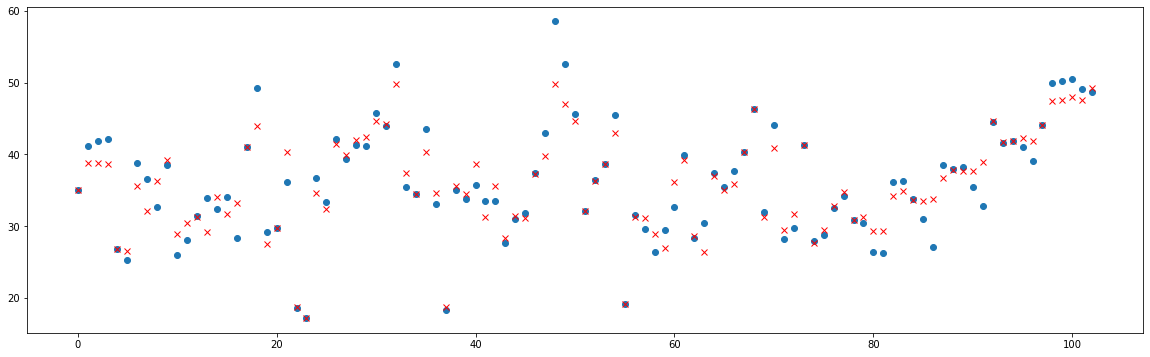

In [70]:
final_model = best_estimator.fit(X, y)
y_hat = best_estimator.predict(X)
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))
print(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
plt.figure(figsize = (20, 6));
plt.plot(y, 'o');
plt.plot(y_hat, 'x', color='red');